<a href="https://colab.research.google.com/github/yrlmzmerve/Open_CV_Tutorial/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPEN CV NOT DEFTERİ

### 1. RESMİ İÇERİ AKTARMA 

img dosyasını pythona aktarılması , veri tipi içerisinde depolanması

not: .py ile image aynı klasörde olmalı, eğer değilse image dosyasının pathi verilmeli

In [61]:
import cv2

In [62]:
img = cv2.imread("messi5.jpg",0)

In [63]:
from google.colab.patches import cv2_imshow

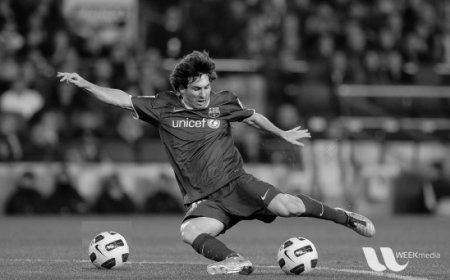

In [64]:
cv2_imshow(img)

In [65]:
img

array([[ 42,  47,  50, ...,  55,  53,  53],
       [ 45,  49,  53, ...,  59,  58,  58],
       [ 48,  54,  59, ...,  65,  64,  63],
       ...,
       [114, 107, 102, ..., 106, 110, 110],
       [118, 120, 111, ..., 111, 117, 117],
       [112, 120, 109, ..., 110, 105, 105]], dtype=uint8)

In [66]:
# siyah- beyaza çevrilen resmi kaydetmek

cv2.imwrite("mess_gray.png", img)

True

### 2. VİDEO İÇERİ AKTARMA 


In [67]:
import cv2
import time

In [68]:
video_name = "MOT17-04-DPM.mp4"

In [69]:
cap = cv2.VideoCapture(video_name)

In [70]:
cap

< cv2.VideoCapture 0x7f03d4f56ad0>

In [71]:
print("Genişlik: ", cap.get(3))
print("Yükseklik: ", cap.get(4))

Genişlik:  1920.0
Yükseklik:  1080.0


In [72]:
if cap.isOpened()==False:
  print("ERROR ** Video açılamadı")

### 3. YENİDEN BOYUTLANDIRMA VE KIRPMA


#### Yeniden Boyutlandırma

In [73]:
import cv2

In [74]:
image = cv2.imread("lenna.png",1)

In [75]:
print("Resim boyutu: ",image.shape)

Resim boyutu:  (512, 512, 3)


In [76]:
imgResize = cv2.resize(image, (800,800))

In [77]:
print("Resized img shape:",imgResize.shape )

Resized img shape: (800, 800, 3)


512 * 512 'lik bir fotoğrafı 800*800 hale getirdik. Piksel büyüttük

#### Kırpma işlemi

In [78]:
from google.colab.patches import cv2_imshow

In [79]:
imgCropped = image[:200, :300] # 200 YÜKSEKLİK 300 GENİŞLİK

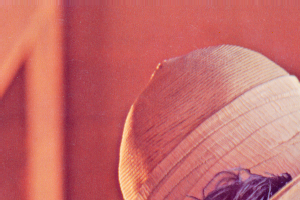

In [80]:
cv2_imshow(imgCropped)

### 4. ŞEKİL VE METİN *EKLEME*


In [81]:
import numpy as np

In [82]:
# şekil ekleme 
img = np.zeros((512,512,3), np.uint8) # siyah bir resim
print(img.shape)

(512, 512, 3)


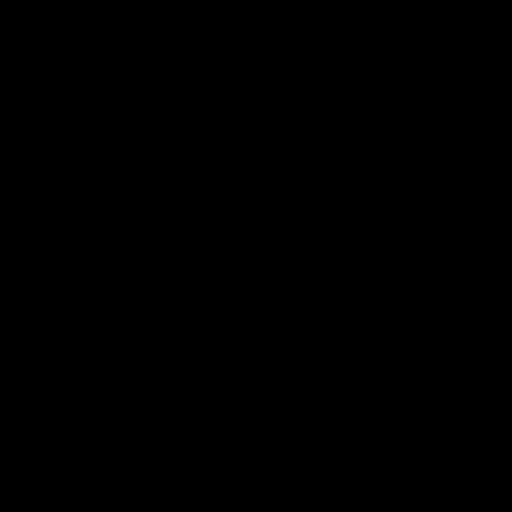

In [83]:
cv2_imshow(img)

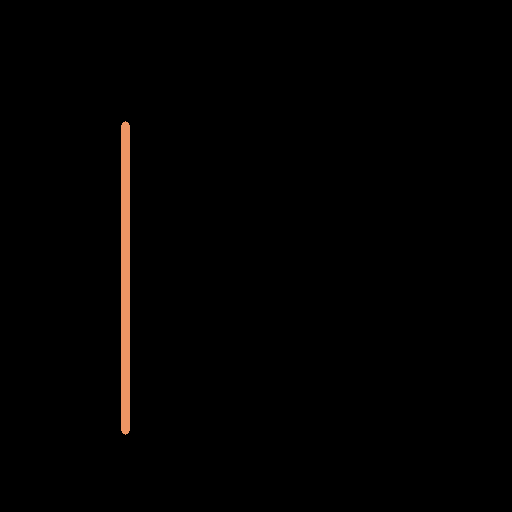

In [84]:
# çizgi
# (resim, başlangıç noktası, bitiş noktası, renk, kalınlık)
cv2.line(img, (125,125), (125,430), (100,149,237), 8) # BGR = (0,255,0)
cv2_imshow(img)

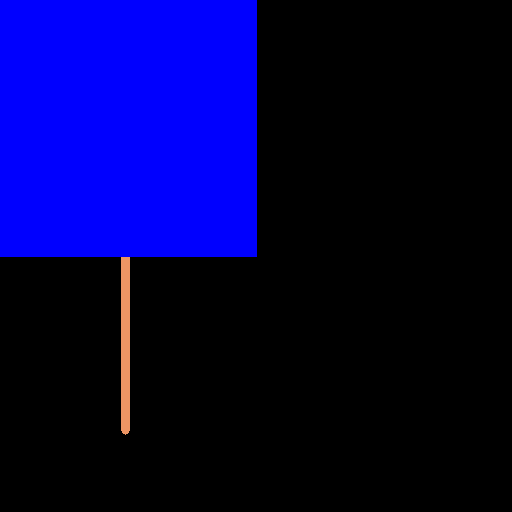

In [85]:
# dikdörtgen
# (resim, başlangıç, bitiş, renk )
cv2.rectangle(img, (0,0), (256,256), (255,0,0), cv2.FILLED)
cv2_imshow(img)

# cv2.FILLED yazılmazsa içi boş olarak gelir

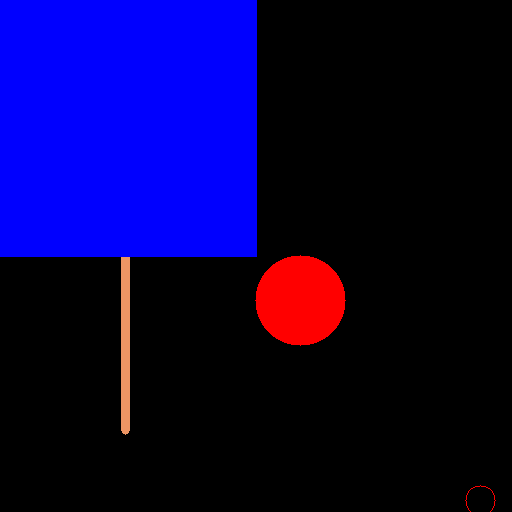

In [86]:
# çember
# (resim, merkez, yarı çap, renk)
cv2.circle(img, (300,300), 45, (0,0,255), cv2.FILLED)
cv2.circle(img, (480,500), 15, (0,0,255)) # içi boş
cv2_imshow(img)

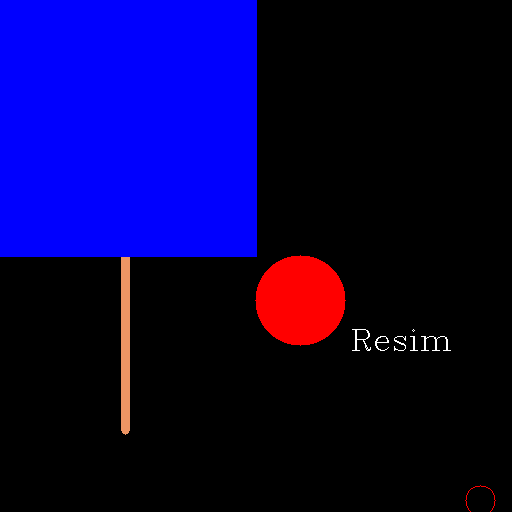

In [87]:
# metin
# (resim, başlangıç noktası, font, kalınlığı, renk)
cv2.putText(img, "Resim", (350,350), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255))
cv2_imshow(img)

### 5. GÖRÜNTÜLERİ BİRLEŞTİRME

In [88]:
import cv2
import numpy as np 

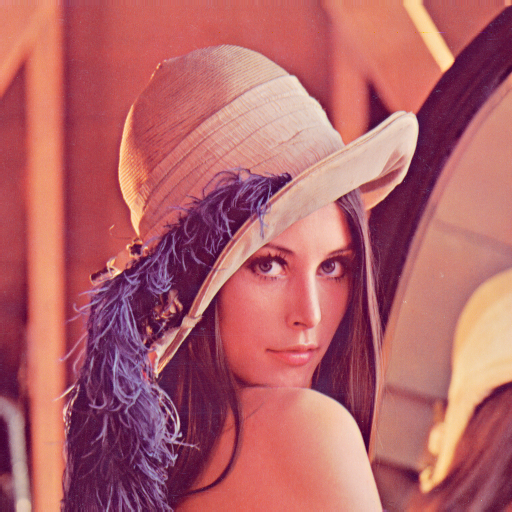

In [89]:
img = cv2.imread("lenna.png")
cv2_imshow(img)

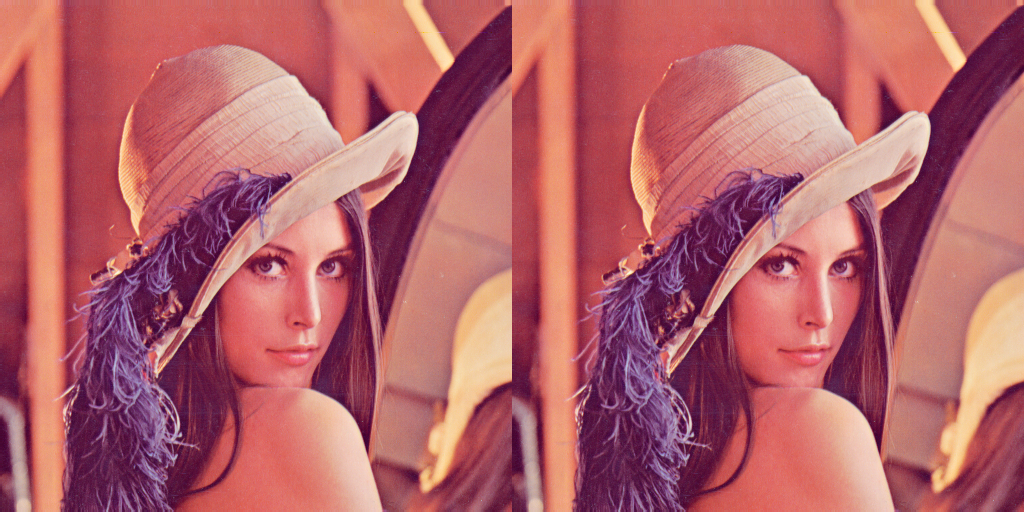

In [90]:
# yatay
hor = np.hstack((img,img))
cv2_imshow(hor)

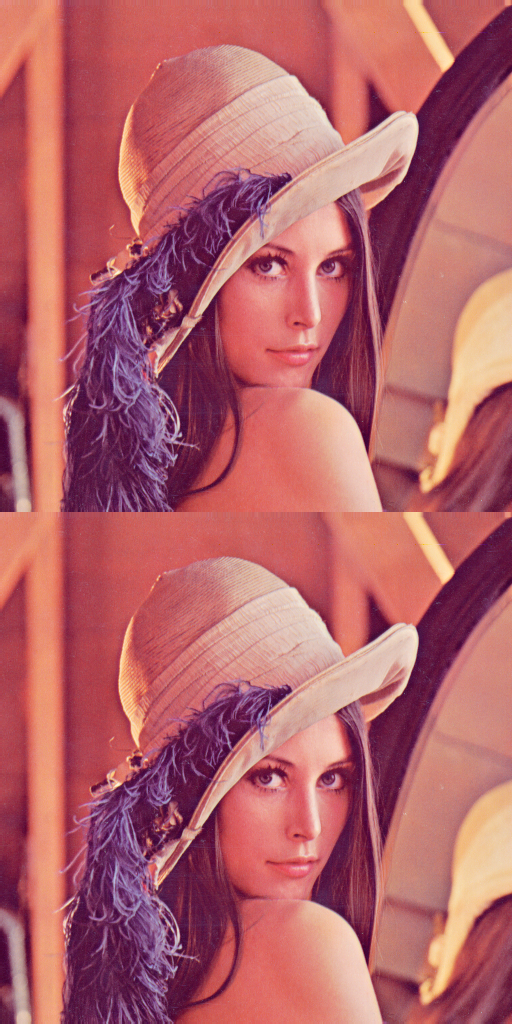

In [91]:
# dikey
ver = np.vstack((img,img))
cv2_imshow(ver)

### 6. PERSPEKTİF ÇARPITMA


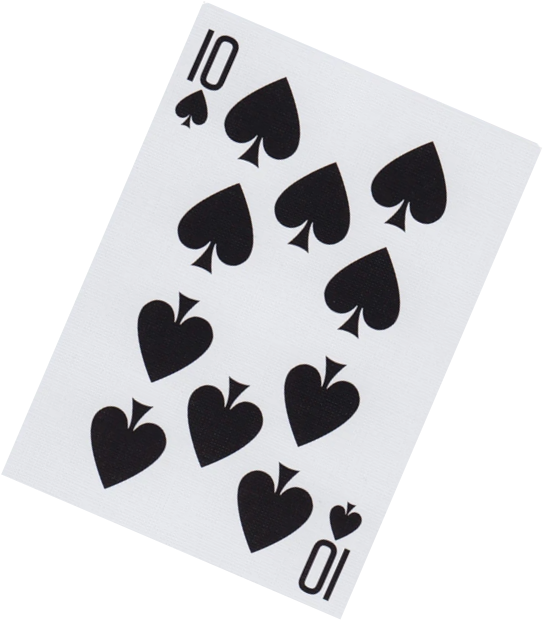

In [92]:
# içe aktar resim
img = cv2.imread("kart.png")
cv2_imshow(img)

In [93]:
width = 400
height = 500

In [94]:
pts1 = np.float32([[230,1],[1,472],[540,150],[338,617]]) # ÇEVİRMEK İSTENİLEN RESMİN KÖEŞELERİ
# aşağıdaki getirilmek istenen hali
pts2 = np.float32([[0,0],[0, height],[width,0],[width,height]])

In [95]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
print(matrix)

[[ 9.88318421e-01  4.80519997e-01 -2.27793757e+02]
 [-4.28952606e-01  8.92451730e-01  9.77666476e+01]
 [-1.23898125e-04  7.89697479e-05  1.00000000e+00]]


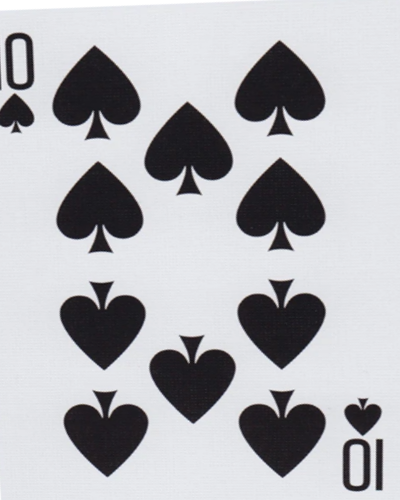

In [96]:
# nihai dönüştürülmüş resim
imgOutput = cv2.warpPerspective(img, matrix, (width,height))
cv2_imshow(imgOutput)

### 7. Görüntüleri Karıştırmak


görüntüleri üst üste birleştirme


In [97]:
import cv2
import matplotlib.pyplot as plt

In [98]:
# karıştırma
img1 = cv2.imread("img1.JPG")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("img2.JPG")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

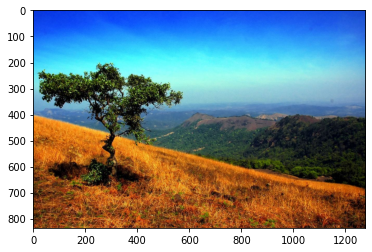

In [99]:
plt.figure()
plt.imshow(img1)

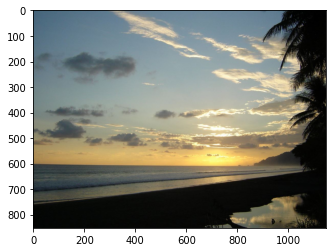

In [100]:
plt.figure()
plt.imshow(img2)

In [101]:
#Birleştirilen 2 resmin boyutları aynı olmalı
print(img1.shape)
print(img2.shape)

(836, 1278, 3)
(852, 1147, 3)


In [102]:
#shapeleri aynı yapma
img1 = cv2.resize(img1, (600,600))
print(img1.shape)

(600, 600, 3)


In [103]:
img2 = cv2.resize(img2, (600,600))
print(img2.shape)

(600, 600, 3)


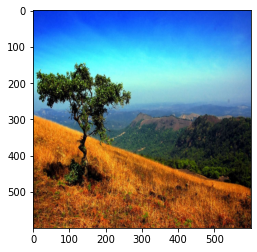

In [104]:
plt.figure()
plt.imshow(img1)

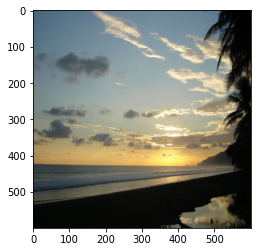

In [105]:
plt.figure()
plt.imshow(img2)

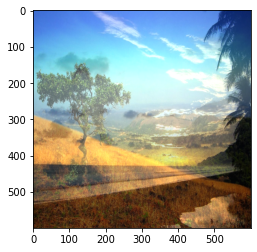

In [106]:
# karıştırılmış resim = alpha*img1 + beta*img2
blended = cv2.addWeighted(src1 = img1, alpha =0.5, src2= img2, beta = 0.8, gamma = 0)
plt.figure()
plt.imshow(blended)

### 8. Görüntüleri Eşikleme


Resimde ki genliklerin değerleri 0 - 255 arasındadır. Eşik değeri olarak 125 seçersek, 125 altındaki değerleri göster dersek resimdeki ana hatlar ortaya çıkar

In [107]:
import cv2
import matplotlib.pyplot as plt

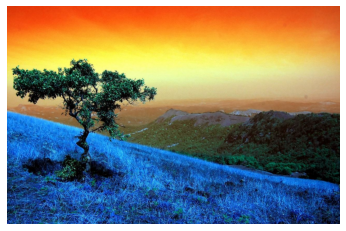

In [108]:
# resmi içe aktar
img = cv2.imread("img1.JPG")
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

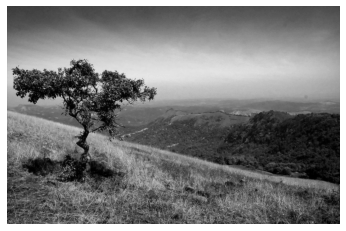

In [109]:
# siyah beyaza çevirme
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
plt.axis("off")
plt.show()

Threshold değerini belirleme

In [110]:
# eşikleme
_, thresh_img = cv2.threshold(img, thresh = 60, maxval = 255, type = cv2.THRESH_BINARY)

# THRESH_BINARY kullanmamız beyaz yapar , THRESH_BINARY_INV yapsaydık sıyah olurdu 
# thresh = 60 değeri üzerindekiler beyazlanacak

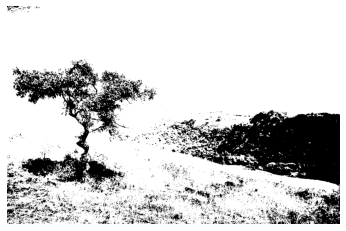

In [111]:
plt.figure()
plt.imshow(thresh_img, cmap = "gray")
plt.axis("off")
plt.show()

adaptive Threshold

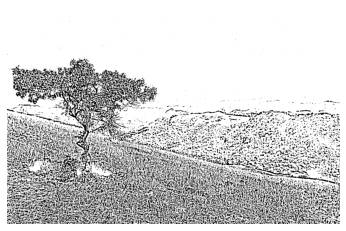

In [112]:
# uyarlamalı eşik değeri
thresh_img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,8)
plt.figure()
plt.imshow(thresh_img2, cmap = "gray")
plt.axis("off")
plt.show()

### 9. Bulanıklaştırma


* Gürültüyü gidermek için kullanılır.
* Görüntüden yüksek frekanslı içeriği temizler (parazit ve kenarlar gibi)

OPEN CV 3 tür bulanıklaştırma tekniği sağlar

1. Ortalama Bulanıklaştırma
2. Gauss Bulanıklaştırma
3. Medyan Bulanıklaştırma

In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [114]:
import warnings
warnings.filterwarnings("ignore")

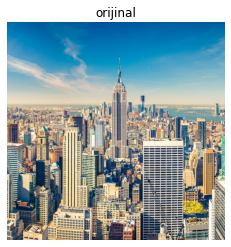

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [115]:
# blurring (detayı azaltır, gürültüyü engeller)
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # opencvde efault olan bgryı değiştirmek için
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Ortalama Blur'))

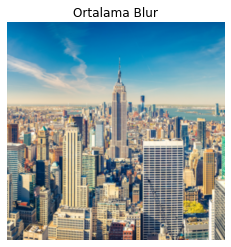

In [116]:
"""
ortalama bulanıklaştırma yöntemi

"""
dst2 = cv2.blur(img, ksize = (3,3))
plt.figure(), plt.imshow(dst2), plt.axis("off"), plt.title("Ortalama Blur")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Blur'))

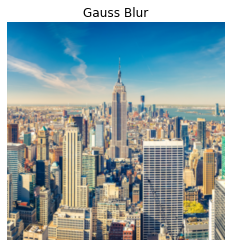

In [117]:
"""
gaussian blur

"""

gb = cv2.GaussianBlur(img, ksize = (3,3), sigmaX = 7)
plt.figure(), plt.imshow(gb), plt.axis("off"), plt.title("Gauss Blur")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Medyan Blur'))

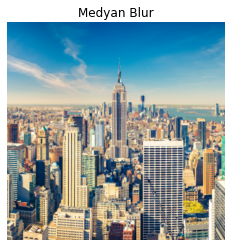

In [118]:
"""
medyan blur

"""
mb = cv2.medianBlur(img, ksize = 3)
plt.figure(), plt.imshow(mb), plt.axis("off"), plt.title("Medyan Blur")

In [119]:
def gaussianNoise(image):
    row, col, ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5
    
    gauss = np.random.normal(mean, sigma, (row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    
    return noisy

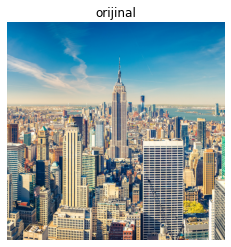

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [120]:
# içe aktar normalize et
# gürültüyü eklemek için
img = cv2.imread("NYC.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

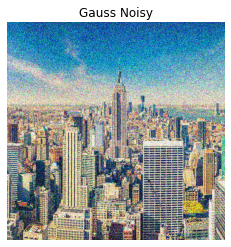

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'Gauss Noisy'),
 None)

In [121]:
gaussianNoisyImage = gaussianNoise(img)
plt.figure(),plt.imshow(gaussianNoisyImage),plt.axis("off"),plt.title("Gauss Noisy"),plt.show()

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'with Gauss Blur'))

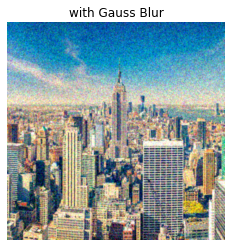

In [122]:
# gauss blur
gb2 = cv2.GaussianBlur(gaussianNoisyImage, ksize = (3,3), sigmaX = 7)
plt.figure(), plt.imshow(gb2), plt.axis("off"), plt.title("with Gauss Blur")

In [123]:
# resim üzerine siyah-beyaz noktacıkların rastgele yerleştirilmesi

def saltPepperNoise(image):
    
    row, col, ch = image.shape
    s_vs_p = 0.5
    
    amount = 0.004
    
    noisy = np.copy(image)
    
    # salt beyaz
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords] = 1
    
    # pepper siyah
    num_pepper = np.ceil(amount * image.size * (1 - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords] = 0
    
    return noisy

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'SP Image'))

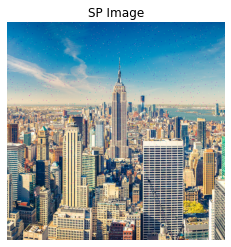

In [124]:
spImage = saltPepperNoise(img)   
plt.figure(), plt.imshow(spImage), plt.axis("off"), plt.title("SP Image")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 542.5, 542.5, -0.5),
 Text(0.5, 1.0, 'with Medyan Blur'))

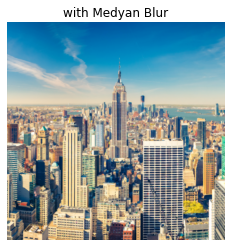

In [125]:
mb2 = cv2.medianBlur(spImage.astype(np.float32), ksize = 3)
plt.figure(), plt.imshow(mb2), plt.axis("off"), plt.title("with Medyan Blur")

### 10. Morfolojik Operasyonlar


* **Erozyon** : Ön plandaki nesnenin sınırlarını aşındırır
* **Genişleme** : Görüntüdeki beyaz gölgeyi arttırır 
* **Açma** : Erozyon + Genişleme . Görüntünün giderilmesinde faydalıdır
* **Kapatma** : Genişleme + Erozyon .Ön plandaki nesnelerin içindeki küçük delikleri veya nesne üzerindeki küçük siyah noktaları kapatmak için kullanışlıdır
* **Morfolojik Gradyan** : Bir görüntünün genişlemesi ve erozyonu arasındaki farktır

In [126]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Orijinal Img'))

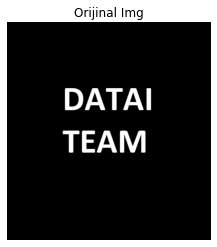

In [127]:
# resmi içe aktar
img = cv2.imread("datai_team.jpg",0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off"), plt.title("Orijinal Img")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Erozyon'))

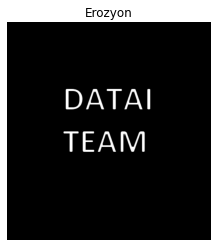

In [128]:
# erozyon
kernel = np.ones((5,5), dtype = np.uint8)
result = cv2.erode(img, kernel, iterations = 1) # iterations= kaç kez yapayım
plt.figure(), plt.imshow(result, cmap = "gray"), plt.axis("off"), plt.title("Erozyon")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Genisleme'))

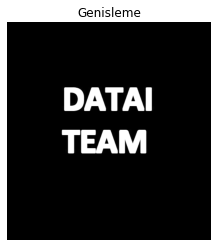

In [129]:
# genişleme dilation
result2 = cv2.dilate(img, kernel, iterations = 1)
plt.figure(), plt.imshow(result2, cmap = "gray"), plt.axis("off"), plt.title("Genisleme")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'White Noise'))

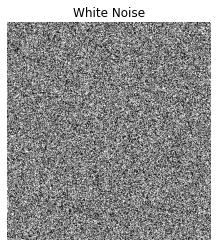

In [130]:
# white noise
whiteNoise = np.random.randint(0,2, size = img.shape[:2])
whiteNoise = whiteNoise*255
plt.figure(), plt.imshow(whiteNoise, cmap = "gray"), plt.axis("off"), plt.title("White Noise")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Img w White Noise'))

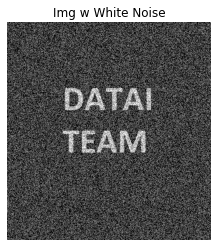

In [131]:
noise_img = whiteNoise + img
plt.figure(), plt.imshow(noise_img, cmap = "gray"), plt.axis("off"), plt.title("Img w White Noise")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Acilma'))

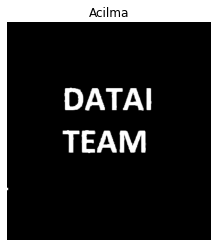

In [132]:
# açılma
opening = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)
plt.figure(), plt.imshow(opening, cmap = "gray"), plt.axis("off"), plt.title("Acilma")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Black Noise'))

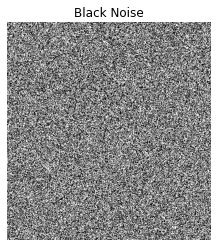

In [133]:
# black noise
blackNoise = np.random.randint(0,2, size = img.shape[:2])
blackNoise = blackNoise*-255
plt.figure(), plt.imshow(blackNoise, cmap = "gray"), plt.axis("off"), plt.title("Black Noise")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Black Noise Img'))

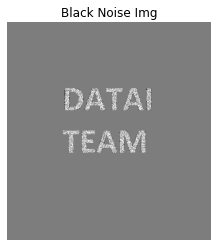

In [134]:
black_noise_img = blackNoise + img 
black_noise_img[black_noise_img <= -245] = 0
plt.figure(), plt.imshow(black_noise_img, cmap = "gray"), plt.axis("off"), plt.title("Black Noise Img")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Kapama'))

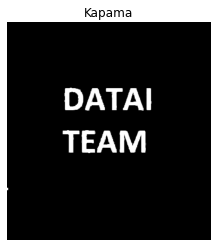

In [135]:
# kapatma
closing = cv2.morphologyEx(black_noise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)
plt.figure(), plt.imshow(opening, cmap = "gray"), plt.axis("off"), plt.title("Kapama")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 499.5, 533.5, -0.5),
 Text(0.5, 1.0, 'Gradyan'))

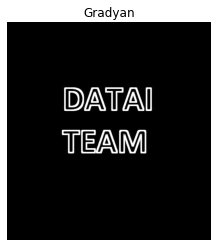

In [136]:
# gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(), plt.imshow(gradient, cmap = "gray"), plt.axis("off"), plt.title("Gradyan")

### 11. Gradyanlar


Görüntü gradyanı, görüntüdeki yoğunluk veya renkteki yönlü bir değişikliktir

Kenarları algılamada kullanılır

In [137]:
import cv2
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5),
 Text(0.5, 1.0, 'Orijinal Img'))

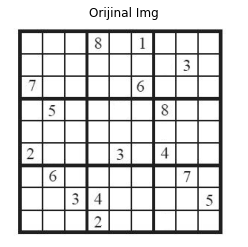

In [138]:
# resmi içe aktar
img = cv2.imread("sudoku.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.axis("off"), plt.title("Orijinal Img")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5),
 Text(0.5, 1.0, 'Sobel X'))

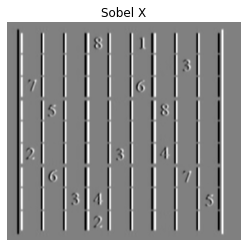

In [139]:
# x gradyan
sobelx = cv2.Sobel(img, ddepth = cv2.CV_16S, dx = 1, dy = 0, ksize = 5)
plt.figure(), plt.imshow(sobelx, cmap = "gray"), plt.axis("off"), plt.title("Sobel X")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5),
 Text(0.5, 1.0, 'Sobel Y'))

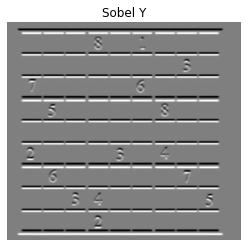

In [140]:
# y gradyan
sobely = cv2.Sobel(img, ddepth = cv2.CV_16S, dx = 0, dy =1, ksize = 5)
plt.figure(), plt.imshow(sobely, cmap = "gray"), plt.axis("off"), plt.title("Sobel Y")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 315.5, 293.5, -0.5),
 Text(0.5, 1.0, 'Laplacian'))

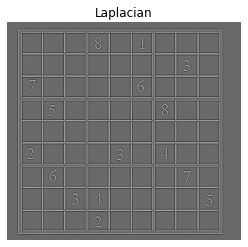

In [141]:
# laplacian gradyan
laplacian = cv2.Laplacian(img, ddepth = cv2.CV_16S)
plt.figure(), plt.imshow(laplacian, cmap = "gray" ),plt.axis("off"), plt.title("Laplacian")

### 12. Histogram


Görüntü histogramı, dijital görüntüdeki ton dağılımın grafiksel bir temsili olarak işlev gören bir histogram türüdür.

Her bir ton değeri için piksel sayısını içerir 

Belirli bir görüntü için histograma bakılarak, ton dağılımı anlaşılabilir

Görüntüdeki renk dağılımları için faydalıdır

In [142]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d35b5f50>)

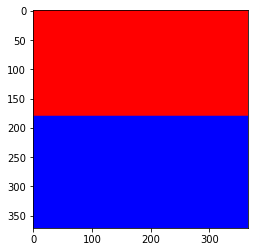

In [143]:
# resmi içe aktar
img = cv2.imread("red_blue.jpg")
img_vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_vis)

In [144]:
print(img.shape)

(371, 366, 3)


(256, 1)


(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f03d352ba10>])

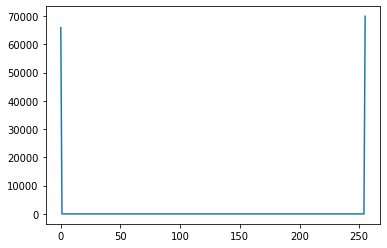

In [145]:
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256]) # channels rgb mi grayscalemi
# mask maskele ile ilgili
print(img_hist.shape)
plt.figure(), plt.plot(img_hist)

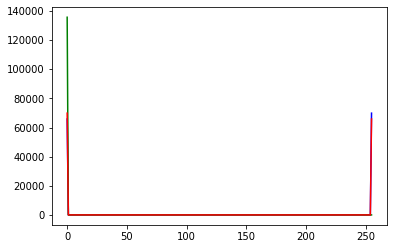

In [146]:
color = ("b", "g", "r")
plt.figure()
for i, c in enumerate(color):
    hist = cv2.calcHist([img], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist, color = c)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d341a0d0>)

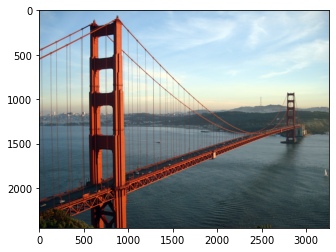

In [147]:
# 
golden_gate = cv2.imread("goldenGate.jpg")
golden_gate_vis = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(golden_gate_vis)   

In [148]:
print(golden_gate.shape)

(2448, 3264, 3)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d33fe710>)

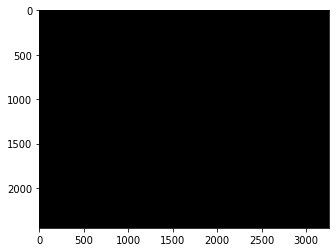

In [149]:
mask = np.zeros(golden_gate.shape[:2], np.uint8)
plt.figure(), plt.imshow(mask, cmap = "gray")  

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d3369c50>)

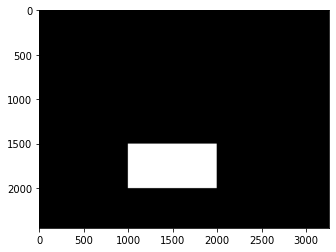

In [150]:
mask[1500:2000, 1000:2000] = 255
plt.figure(), plt.imshow(mask, cmap = "gray") 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d32dd1d0>)

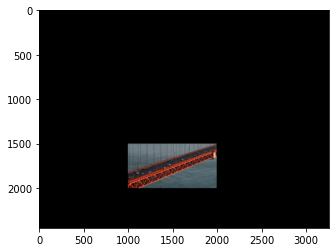

In [151]:
masked_img_vis = cv2.bitwise_and(golden_gate_vis, golden_gate_vis, mask = mask)
plt.figure(), plt.imshow(masked_img_vis, cmap = "gray") 

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f03d32bddd0>])

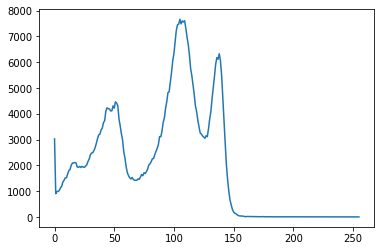

In [152]:
masked_img = cv2.bitwise_and(golden_gate, golden_gate, mask = mask)
masked_img_hist = cv2.calcHist([golden_gate], channels = [0], mask = mask, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(masked_img_hist) 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d3238550>)

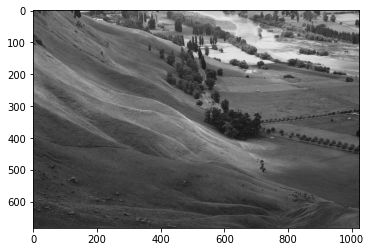

In [153]:
# histogram eşitleme
# karşıtlık arttırma
img = cv2.imread("hist_equ.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray") 

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f03d31a7650>])

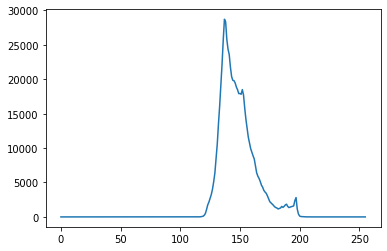

In [154]:
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(img_hist)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f03d3110f50>)

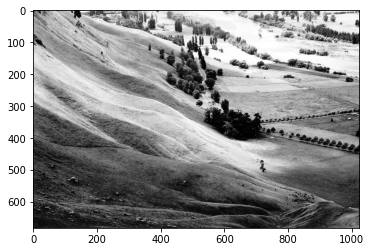

In [155]:
eq_hist = cv2.equalizeHist(img)
plt.figure(), plt.imshow(eq_hist, cmap = "gray") 

(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7f03d3103650>])

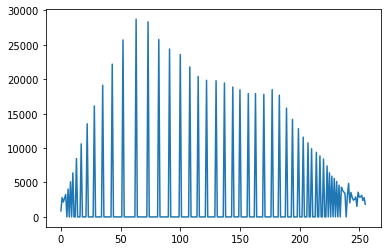

In [156]:
eq_img_hist = cv2.calcHist([eq_hist], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(eq_img_hist)